(178, 2)


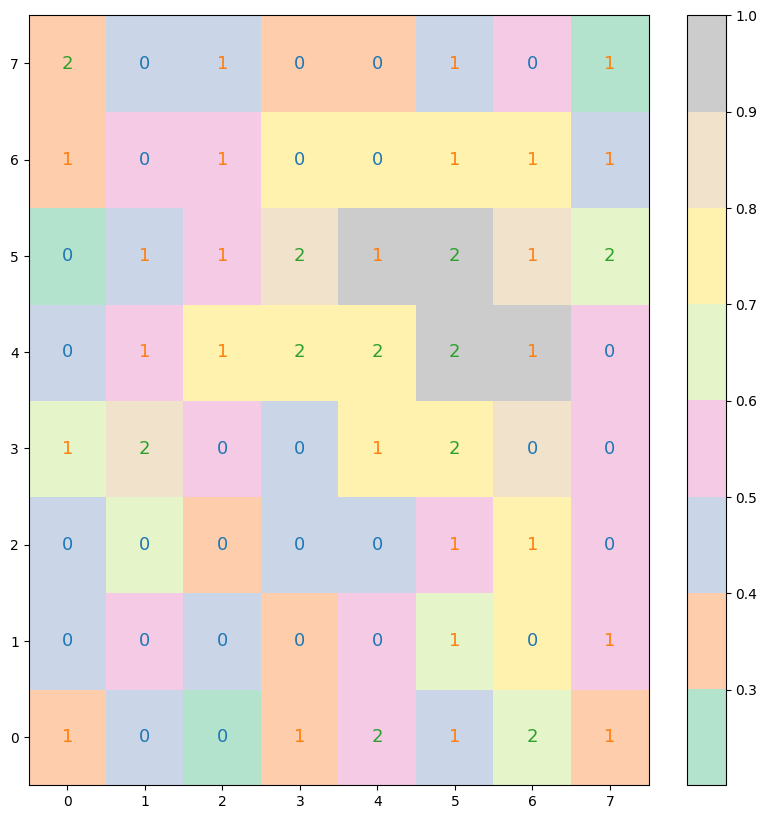

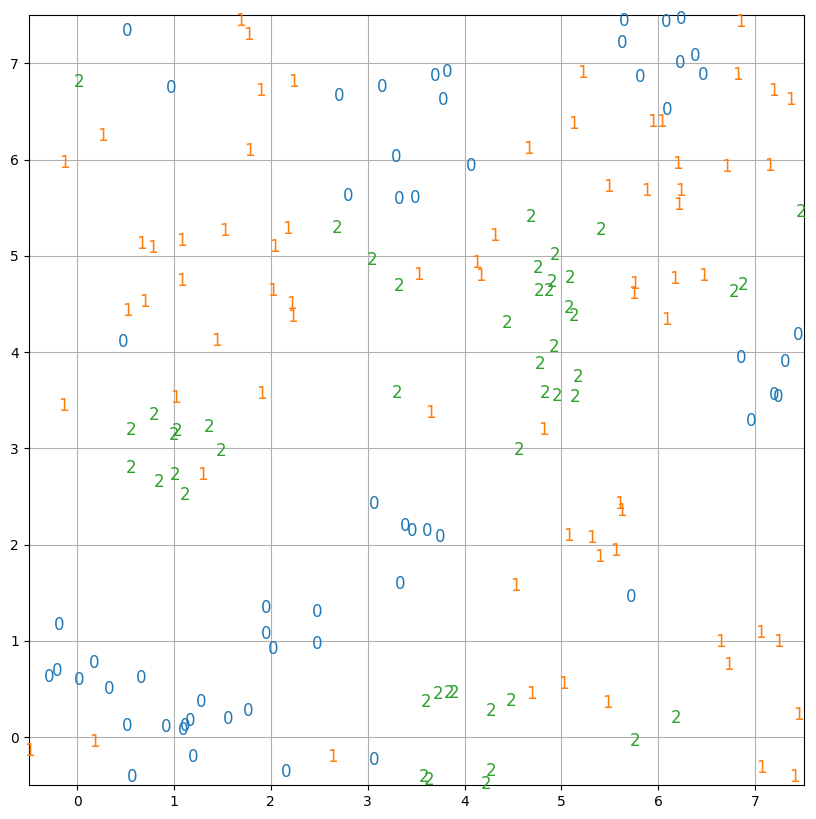

In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
import matplotlib.pyplot as plt

# Carga el conjunto de datos y realiza la preparación de los datos
vinhos = pd.read_csv('wine.csv')
x = vinhos.iloc[:, 1:].values
y = vinhos.iloc[:, 0].values
normalizador = MinMaxScaler(feature_range=(0, 1))
x = normalizador.fit_transform(x)

# Crea e entrena el SOM
som = MiniSom(x=8, y=8, input_len=13, sigma=1.0, learning_rate=0.5, random_seed=2)
som.random_weights_init(x)
som.train_random(data=x, num_iteration=100)

# Mapeo de activación
q = som.activation_response(x)

# Mapeo de clases
y[y == 1] = 0
y[y == 2] = 1
y[y == 3] = 2

# Gráfico mejorado del SOM
winners = np.array([som.winner(x) for x in x])
grid_size = som.get_weights().shape

print(winners.shape)
# Crear una matriz para almacenar las etiquetas de clase correspondientes a las neuronas ganadoras
class_labels = np.zeros((grid_size[0], grid_size[1]), dtype=int)

for i, (x_, y_) in enumerate(winners):
    class_labels[x_, y_] = y[i]

plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='Pastel2')  # Mapa de distancia
plt.colorbar()

# Etiquetar cada neurona con su clase correspondiente
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        plt.text(i + 0.5, j + 0.5, str(class_labels[i, j]),
                 color='C' + str(class_labels[i, j]),
                 fontsize=13, ha='center', va='center')

plt.xticks(np.arange(0.5, grid_size[0], 1), range(grid_size[0]))
plt.yticks(np.arange(0.5, grid_size[1], 1), range(grid_size[1]))

plt.show()

plt.figure(figsize=(10, 10))
for i in range(len(x)):
    plt.text(winners[i][0] + np.random.rand(), winners[i][1] + np.random.rand(), str(y[i]),
             color='C' + str(y[i]), fontsize=12, ha='center', va='center')

plt.xlim(0, grid_size[0])
plt.ylim(0, grid_size[1])
plt.xticks(np.arange(0.5, grid_size[0], 1), range(grid_size[0]))
plt.yticks(np.arange(0.5, grid_size[1], 1), range(grid_size[1]))
plt.grid()
plt.show()



training...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.12848609857778193
quantization...
building new image...
done.


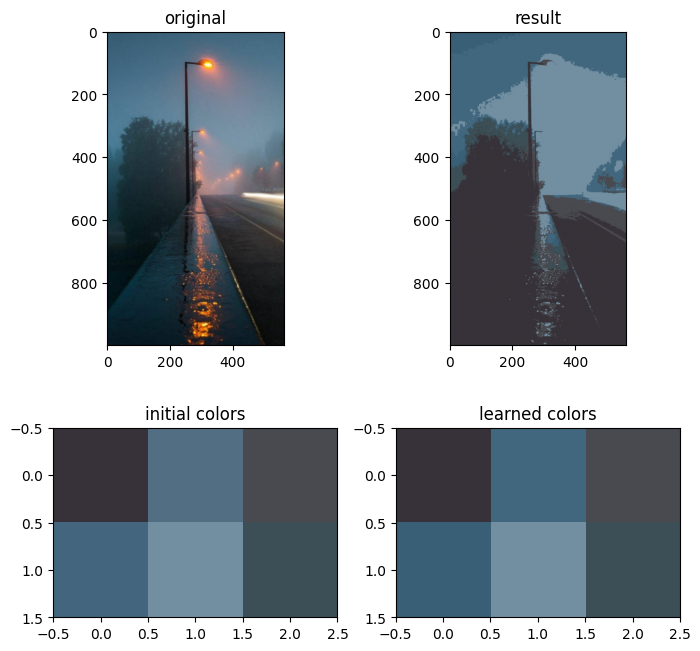

In [4]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('rain.jpeg')

pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3)) / 255.

print('training...')
som = MiniSom(2, 3, 3, sigma=1.,
              learning_rate=0.2, neighborhood_function='bubble')  
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()  
som.train(pixels, 10000, random_order=True, verbose=True)

print('quantization...')
qnt = som.quantization(pixels) 
print('building new image...')
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):  
    clustered[np.unravel_index(i, shape=(img.shape[0], img.shape[1]))] = q
print('done.')


plt.figure(figsize=(7, 7))
plt.figure(1)
plt.subplot(221)
plt.title('original')
plt.imshow(img)
plt.subplot(222)
plt.title('result')
plt.imshow(clustered)

plt.subplot(223)
plt.title('initial colors')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('learned colors')
plt.imshow(som.get_weights(), interpolation='none')

plt.tight_layout()
plt.show()